# Анализ интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 

компьютерных игр и присваивает им подходящую возрастную категорию.

## Цель иследования 

1) Исследовательский анализ данных:

- Посмотрим, сколько игр выпускалось в разные годы.

- Посмотрим, как менялись продажи по платформам. 

- Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

- Какие платформы лидируют по продажам, растут или падают.

- Построим график по глобальным продажам игр в разбивке по платформам. Опишите результат.

- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

- Соотнесем выводы с продажами игр на других платформах.

- Посмотрим на общее распределение игр по жанрам.

2) Проверьте гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Ход иследования 

Данные о интернет-магазине я получу из файла /datasets/games.csv. О качестве данных нам ничего не известно. Поэтому перед тем, как переходить к целям иследования, понадобится обзор данных.

Таким образом моё иследование пройдет в нескольких этапах:
- обзор данных
- предобработка данных
- расчеты и добавление результатов в таблицу
- проведение анлиза 
- составленя портрет пользователя каждого региона
- проверка гипотез
- общий вывод

 Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

##  Загрузка данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

Изучим общую информацию

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Чтобы познакомиться с данными подробнее, выведем информацию о количественных значениях в каждом столбце:

In [4]:
data.describe().loc[['count','mean','min','50%','max']]

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.00000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.14506,0.077617,0.047342,68.967679
min,1980.000000,0.000000,0.00000,0.000000,0.000000,13.000000
50%,2007.000000,0.080000,0.02000,0.000000,0.010000,71.000000
max,2016.000000,41.360000,28.96000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Просмотрели исходные данные, изучим их глубже что-бы увидеть полную иноформацию в данных, найти и исправить по возможности ошибки.
В таблице даны 11 столбцов и 16715 строк, содержащие исторические данные о продажах игр, информацию об оценках пользователей и экспертов, жанрах и платформах.

Данные представлены типами float и object. На этапе предобработки данных необходимо будет произвести замену типов в следующих столбцах:

- Year_of_Release (год выпуска игры) - заменим на целостный тип;
- User_Score (оценка пользователей) - заменим на вещественный тип.

В названиях колонок имееются нарушения стиля написания: строчные буквы сочетаются с прописными. На этапе предобработки данных будет необходимо их переименовать.

Видно, что в 6 столбцах имеются пропущенные значения. На следующем этапе определим их количество и заполним пропуски там, где это необходимо и обоснованно.


На данном этаме мы видим пропуски в столбцах Critic_Score,	User_Score,	Rating,

##  Предобработка данных

посмотрим на название столбцов 

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

приведем столбцы к нижнему регистру и проверим 

In [7]:
data.columns = data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Обработка пропусков

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
data.duplicated(subset=['name', 'platform']).sum()

5

- По 2 пропуска встречается в столбцах name и genre. Так это очень небольшое количество. Узнаем природу.

- В столбце year_of_release имеется 269 пропусков - слишком много, чтобы заполнять их вручную с учетом того, что на разных платформах одна и та же игра могла выходить в разные годы. Заполнять такие данные средним некорректно - могут исказятся результаты, посмотрим на природу появления пропусков.

- В столбцах critic_score, user_score и rating пропусков достаточно много. Так как такие данные, как оценка критиков и пользователей или рейтинг заменить средним нельзя, для разберем эти столбцы.

Посмотрим какие года преддставлены в этой таблице

In [10]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Перед удалениме строк посмотрим сколько строк было изначально

In [11]:
data.shape

(16715, 11)

Производим удаление 

In [12]:
data = data.dropna(subset=['name','genre','year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Обратим внимание сколько строк в итоге ушло

In [13]:
data.shape

(16444, 11)

Мы удалили около 271, данный код удалил нужно количество 

Определим какое количество строк содержат в столбце user_score значения, записанные как tbd:

In [14]:
data['user_score'][data['user_score'] == 'tbd'].count()

2376

В столбце User_Score встречаются значения, записанные как tbd - To Be Determined - то есть еще не определенный пользователями рейтинг. Таких значений достаточно много - 2376, поэтому просто удалять их нельзя, так как это отразится на всем датасете, заменять их средними значениями, сгруппировав игры по жанрам и т.д., будет некорректно - могут исказиться результаты. Поэтому заменим их на NaN.

In [15]:
data = data.replace('tbd', np.nan)

print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [16]:
data['rating'].isna().sum()

6676


Посмотрим на столбец с рейтингом где большое количество пропусков 6676. 
Попробуем объяснить данные пропуски.

1) ассоциация Entertainment Software Rating Board - американская рейтинговая система игр, поэтому игры, выпускаемые в Европе или Азии, могли оцениваться не по этой системе, а по другой. В результате чего рейтинг по системе ESRB не присваивается.

2) для определения рейтинга издатель должен сам присылать в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры и заполнять специальную анкету сведениями о содержании игры. По какой-то причине издатель мог этого не сделать и игра осталась без присвоенного рейтинга.

3) компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки. Поэтому для части игр рейтинг может быть еще в процессе определения. 

Эти данные мы нашли в википедии 

В связи с этим, пропуски значений рейтинга будем заполнять значениями "неизвестно" - "UNK", чтобы в дальнейшем не потерять часть данных.

In [17]:
# какие категории чаще встречаются в рейтинге 
data['rating'].value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

 Немного покопавшись в интернете можно получить определения для представленных рейтингов. 
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»:
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- K-A - старый вариант маркировки E (for everyone)

In [18]:
data['rating'] = data['rating'].fillna('UNK')    

Посмотрим на столбцы с критокой пользователей\критиков 

In [19]:
display('процент пропусков от всего датасета', data['critic_score'].isna().mean()*100)

'процент пропусков от всего датасета'

51.453417659936754

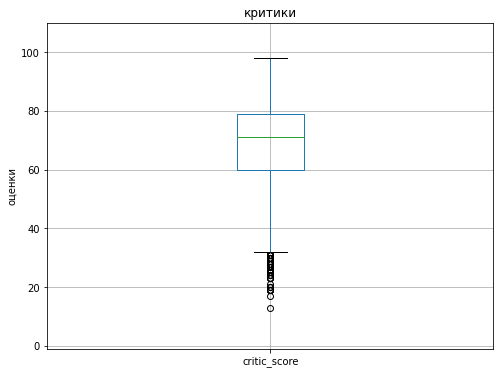

In [43]:
data.boxplot(column ='critic_score', figsize=(8, 6))
plt.title('критики')
plt.ylim(-1,110)
plt.ylabel('оценки')
plt.show()

Мы можем увидеть выбросы критиков от 10 до 33, а процент пропусков достигает до 50%. Мы не можем удалить такие пропуски. Таким образом оставим пропуски без изменений.

In [21]:
display('процент пропусков от всего датасета', data['user_score'].isna().mean()*100)

'процент пропусков от всего датасета'

54.61566528825104

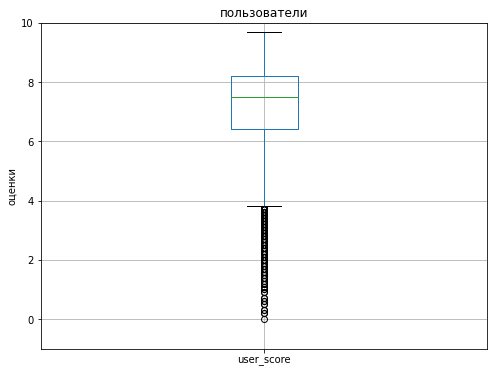

In [45]:
data.boxplot(column ='user_score', figsize=(8, 6))
plt.title('пользователи')
plt.ylim(-1,10)
plt.ylabel('оценки')
plt.show()

В этом столбце пропусков более 56%, а выбросы идут от 0 до 3,9. Данное колличесвто пропусков заменить среднем значением нельзя, это очень исказит данные для дальнейшего иследования. Оставим прропуски 

Каждая игра получается индивидуальной и оценка критиков, и пользователей - субъективное мнение об игре конкретного года, жанра, платформы, студии разработчика, издателя, рекламы и репутации о серии игр. Слишком много факторов необходимо учесть для восстановления данных.

### Замена типов данных

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


преобразуем столбец 'year_of_release' к формату int

In [47]:
data['year_of_release'] = data['year_of_release'].astype('int')

преобразуем столбец 'user_score' к формату float

In [48]:
data['user_score'] = data['user_score'].astype(float)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [50]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'other_sales']].sum(axis='columns')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,78.77
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UNK,33.43
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,31.73
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.49
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UNK,21.16


Вывод

На этапе подготовки данных были произведены следующие действия:

- Переименованы столбцы без нарушения стиля написания.
- Обработаны пропуски в данных:
- Были удалены строки с пропусками в столбцах name, genre и year_of_release.
- В столбцах critic_score, user_score и rating пропуски были оставлены.
- В столбце user_score значения, записанные как "tbd", заменены на NaN.
- Заменены типы данных в столбцах year_of_release на целочисленный тип и user_score на вещественный тип.
- Расчитаны суммарные продажи во всех регионах и добавлены в отдельный столбец total_sales. Размер суммарных продаж составляет от 0 до 82,5 млн проданных копий.

## Проведите исследовательский анализ данных


###  Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

90Сформируем сводную таблицу по количеству выпущенных игр в каждый год. Чтобы проще было оценить распределение, дополнительно построим график распределения выпущенных игр по годам.

In [51]:
data['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
FIFA 14                                    9
Ratatouille                                9
LEGO Jurassic World                        8
                                          ..
Corpse Party: Book of Shadows              1
Cruis'n World                              1
JoJo no Kimy? na B?ken Fantomu Buraddo     1
Ping Pals                                  1
Hunter x Hunter: Wonder Adventure          1
Name: name, Length: 11426, dtype: int64

In [52]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.29
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,UNK,2.75
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.55
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.23
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,UNK,1.00
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,UNK,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


In [53]:
data_1 = data[['name','year_of_release']]
data_1

,name,year_of_release
0,Wii Sports,2006
1,Super Mario Bros.,1985
2,Mario Kart Wii,2008
3,Wii Sports Resort,2009
4,Pokemon Red/Pokemon Blue,1996
...,...,...
16710,Samurai Warriors: Sanada Maru,2016
16711,LMA Manager 2007,2006
16712,Haitaka no Psychedelica,2016
16713,Spirits & Spells,2003


In [54]:
data_1.duplicated().sum()

4249

In [55]:
data_1 = data_1.drop_duplicates()

In [56]:
data_1[data_1['name'] == 'Need for Speed: Most Wanted']

,name,year_of_release
253,Need for Speed: Most Wanted,2005
523,Need for Speed: Most Wanted,2012
6273,Need for Speed: Most Wanted,2013


In [57]:
data_2 = data_1.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
data_2

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


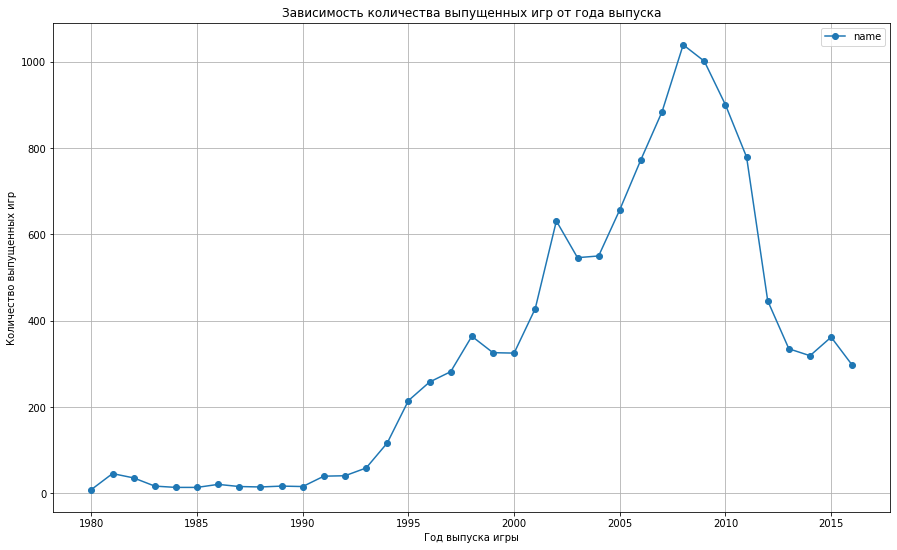

In [58]:
data_2.plot(marker='o', grid=True, figsize=(15, 9))

plt.xlabel(r'Год выпуска игры')
plt.ylabel(r'Количество выпущенных игр')
plt.title(r'Зависимость количества выпущенных игр от года выпуска')
plt.show()

С 1980 по 1993 года выпускалось небольшое количество игр - от 9 до 100 ежегодно, что объясняется тем, что только 1979 год стал отправной точкой для доступных домашних компьютеров и появления портативных карманных игровых устройств.

Из полученных данных видно то, что начиная с 1993 года, количество выпускаемых игр начало стремительно расти. Это связано с тем, что в начале 90-х годов произошли заметные инновации в компьютерных играх - переход от 2D к 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени.

К 2008 году количество выпускаемых игр достигло максимального значения - 1427, затем количество пошло на спад, и к 2015 году количество игр было уже более, чем в 2 раза меньше, по сравнению с 2008 годом.

Такая динамика объясняется различными уровнями технологического развития поддержка на различных типах игровых устройств, доступности ПК, игровых консолей, приставок и т.д., появлением новых жанров игр, а также различным уровнем популярности игр в целом.

По этой причине было бы некорректно при при последующем анализе и прогнозировании продаж на последующие периоды использовать данные за ранние годы. Поэтому в дальнейшем будем рассматривать периоды, когда количество выпускаемых игр превысило 300 шт./год, - с 1998 по 2016 года.

### Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Определим, как менялись продажи игр по платформам. Для этого выделим платформы с наибольшими суммарными продажами и построим для них распределение по годам.

In [59]:
platforma = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
platforma

,total_sales
platform,
PS2,1096.02
X360,948.94
PS3,851.93
Wii,822.90
DS,627.76
PS,587.80
PS4,298.18
GBA,266.32
PC,255.59


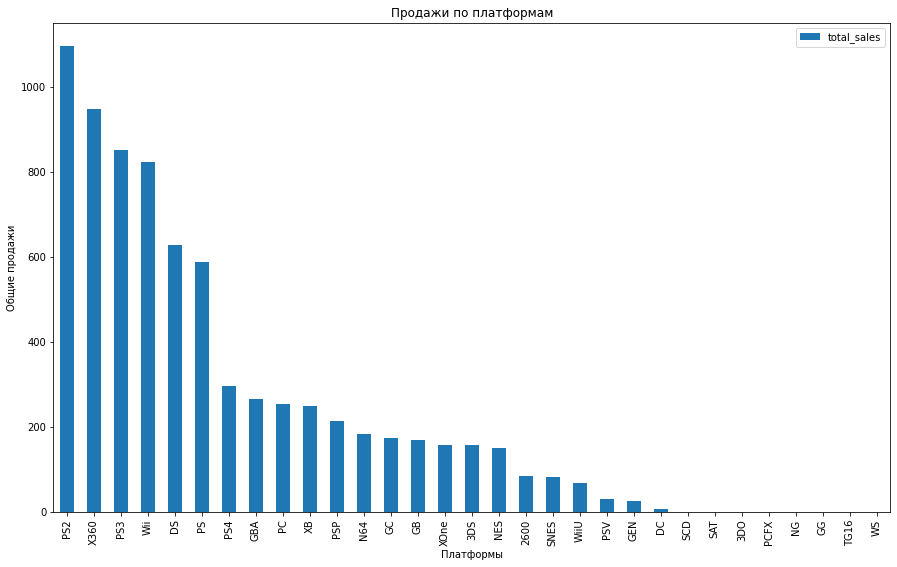

In [60]:
platforma.plot(y='total_sales', kind='bar', figsize=(15, 9), ylabel='Общие продажи', xlabel='Платформы')
plt.title(label = 'Продажи по платформам')
plt.show()

Выберем платформы с наибольшими суммарными продажами это PS2, X360, PS3, Wii, DS, PS. Для нас это приставки сони 2 и 3 поколения, а так же знаменитый икс-бокс 360 и виды нинденда

PS2


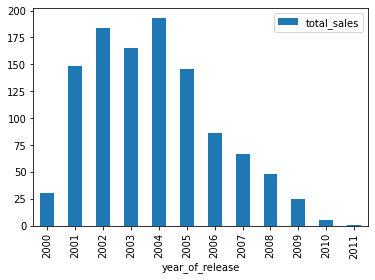

X360


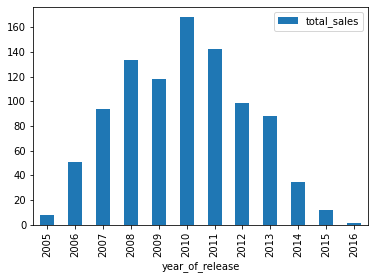

PS3


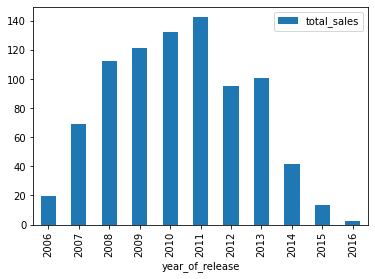

Wii


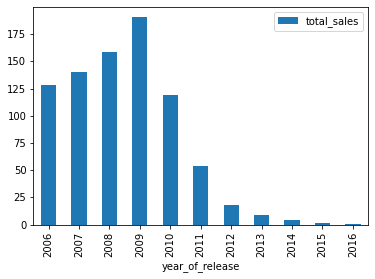

DS


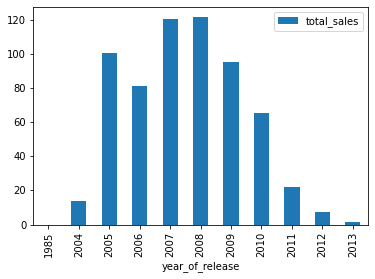

PS


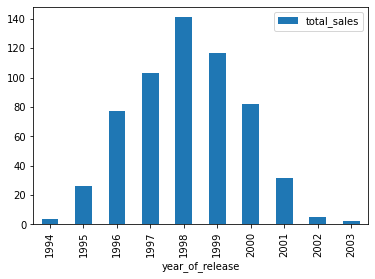

In [61]:
for platform in platforma.index[:6]:
    print(platform)
    (data
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()
   

Разберем полученные графики:

- PlayStation (PS): пик продаж для этой платформы приходится на 1998 год. Игры для этой платформы продавались в 1994-2003 годах.
- PlayStation 2 (PS2): пик продаж для этой платформы приходится на 2004 год. Игры для этой платформы продавались в 2000-2011 годах.
- Nintendo DS (DS): пик продаж для этой платформы приходится на 2007 год. Игры для этой платформы продавались в 2004-2013 годах.
- Xbox 360 (X360): пик продаж для этой платформы приходится на 2010 год. Игры для этой платформы продавались в 2005-2016 годах.
- Nintendo Wii (Wii): пик продаж для этой платформы приходится на 2009 год. Игры для этой платформы продавались в 2006-2016 годах.
- PlayStation 3 (PS3): пик продаж для этой платформы приходится на 2011 год. Игры для этой платформы продавались в 2006-2016 годах.
Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются. 
При этом видно, что из представленных данных все платформы уже не являются актуальными. По каждой из рассмотренных платформ пик суммарных продаж достигался через 3-5 лет после их выхода. В среднем игры на одной платформе выпускались в течение 10 лет.

Также видно, что на графике распределения суммарных продаж по годам для платформы DS имеется выброс, относящийся к 1985 году (сама консоль была выпущена в 2004 году).

### Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Для построения прогноза на 2017 год необходимо учитывать только данные за актуальный период. В предыдущем пункте мы пришли к выводу о том, что по многим причинам (в основном связанным с недостаточным развитием игровой индустрии на тот момент) данные, относящиеся к ранним периодам необходимо отброcить, и использовать в работе данные с 1998 по 2016 года.

Также с учетом того, что время жизни платформы составляет примерно 10-11 лет, а пик суммарных продаж достигается примерно через 3-5 лет, еще немного урежем актуальный период и отберем данные от 2013 года.

In [62]:
# создаем таблицу с актуальными годами
top_data = data.query('year_of_release > 2012')

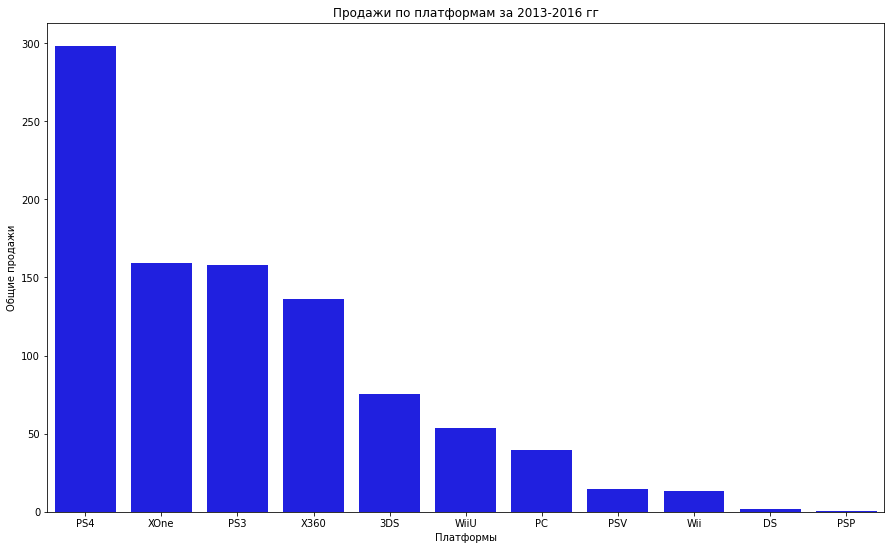

In [63]:
# отберем самые популярные платформы
top_platform = (
    top_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(15, 9))
(sns.barplot(data = top_platform, x = top_platform.index, y = 'total_sales', color='blue')
    .set(title = 'Продажи по платформам за 2013-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

На графике видно, что платформы, показывающие успешные показатели по продажам, значительно отличаются от того графика, где представлены продажи платформ за все время. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, а на втором месте находился XboxOne. PS4 и XboxOne являются привлекательнее остальных платформ.

PS4


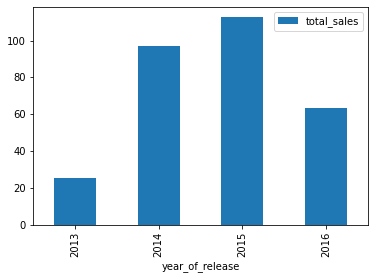

XOne


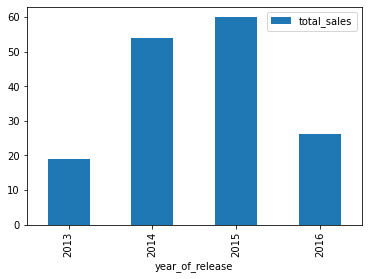

PS3


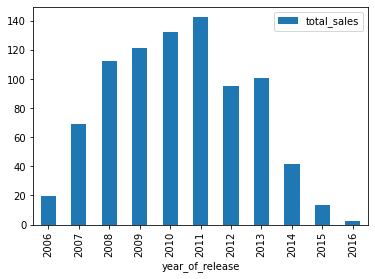

X360


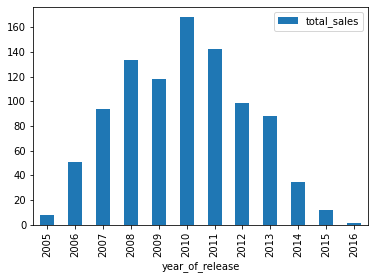

3DS


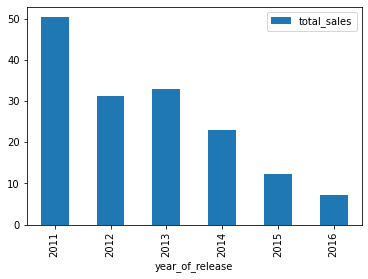

WiiU


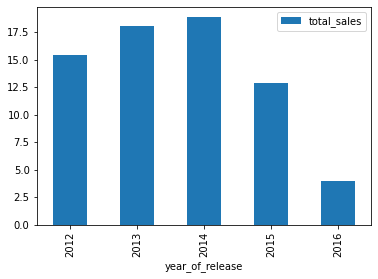

PC


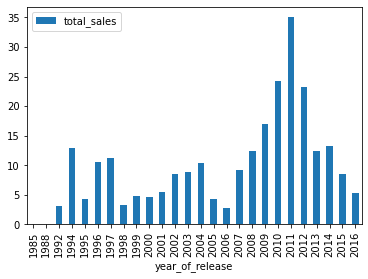

PSV


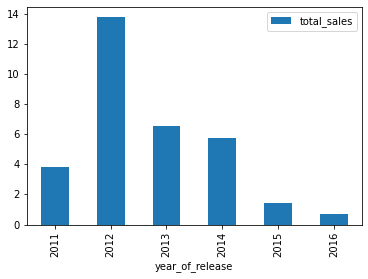

Wii


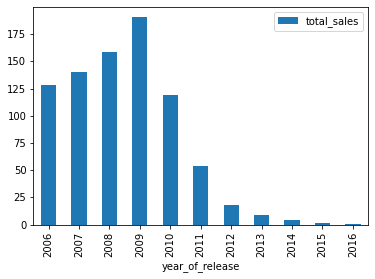

DS


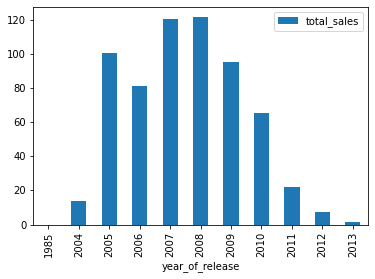

PSP


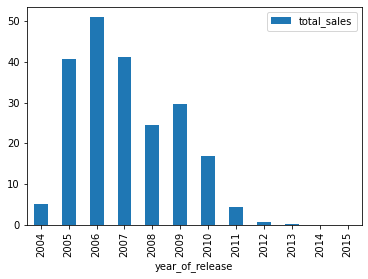

In [64]:
for platform in top_platform.index:
    print(platform)
    (data.query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Таким образом у нас имеются не все данные за 2016 год, немного сложно сказать о том, находятся ли сейчас продажи каких-либо игр на определенных платформах на пике или на спаде. Однако точно можно заметить, что некоторые платформы уже потеряли свою презентабельность, так как 3DS, PS3, X360, PC, Wii, PSP.
Остальные же платформы более устойчева стоят. Потенциально прибыльные платформы:
- PS4
- XOne
- PSV

Дополнительно построим график «ящик с усами» по перспективным платформам котрые мы выбрали.

(0.0, 3.0)

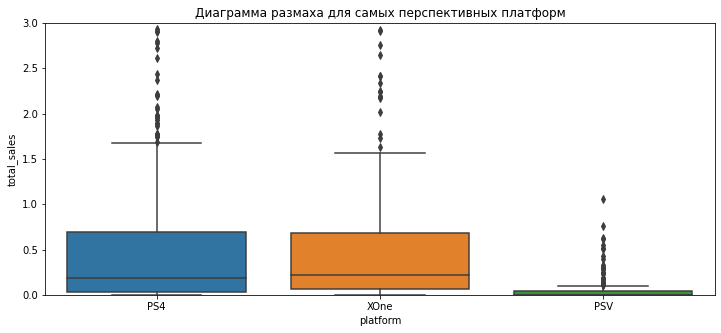

In [65]:
top_platform = top_data[(top_data['platform'] == 'PS4') | (top_data['platform'] == 'XOne') | (top_data['platform'] == 'PSV')]

plt.figure(figsize=(12,5))
sns.boxplot(x = top_platform['platform'], y = top_platform['total_sales'])
plt.title('Диаграмма размаха для самых перспективных платформ')
plt.ylim(0, 3)

Распределения для PS4 и XOne похожи, медианы находятся практически на одном уровне, размах "усов" тоже практически совпадает. Для PSV медиана чуть меньше, как и размах "усов".

Исходя из этого, можно сделать вывод о том, что для планирования рекламной кампании на 2017, стоит выбрать платформы PS4 или XOne.

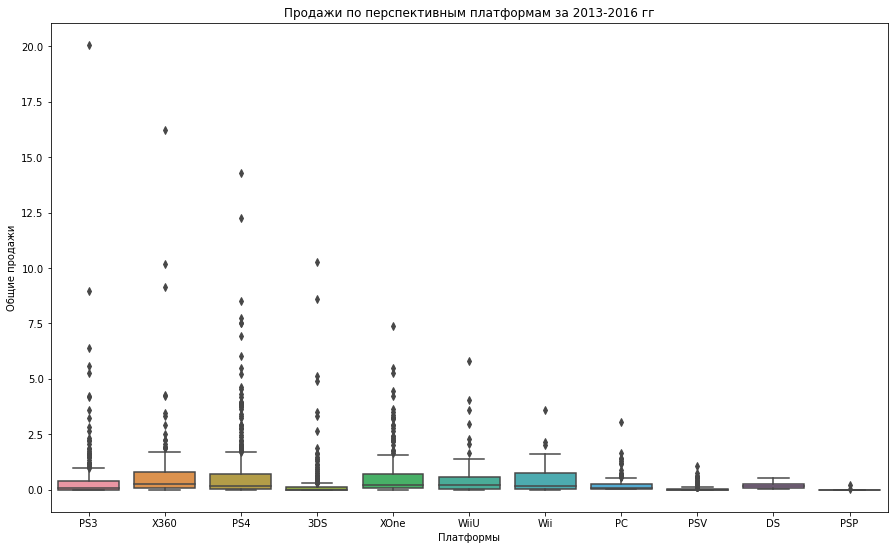

In [83]:
# построим "ящики с усами" для всех остальных платформ
plt.figure(figsize=(15, 9))
(sns.boxplot(data = top_data, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2013-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.show()       

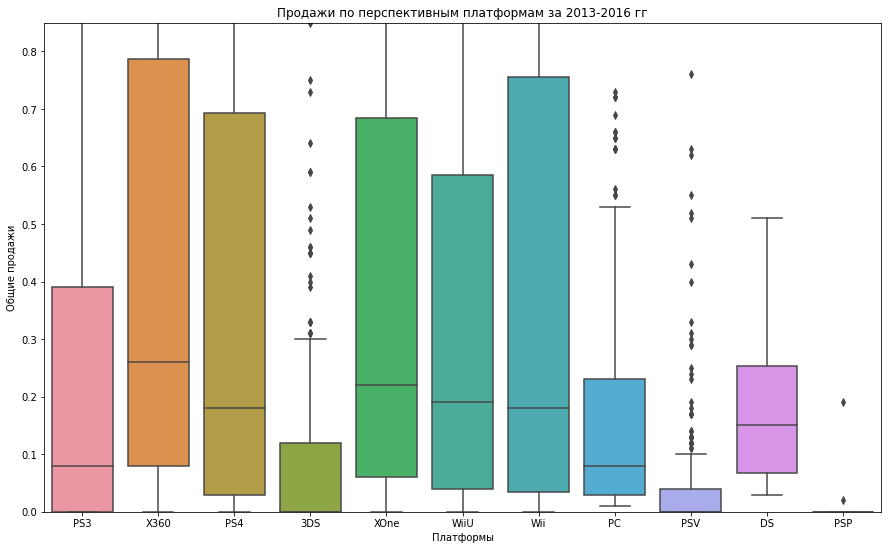

In [67]:
plt.figure(figsize=(15, 9))
(sns.boxplot(data = top_data, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2013-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 0.85)))
plt.show()

In [78]:
top_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.425396
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.153007
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.000000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.000000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.070000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,20.070000


Вывод

На данном графике видно, что распределение продаж среди платформ примерно одинаковое и медиана продаж находится на примерно одном уровне (0,2 миллиона проданных копий). Также можно отметить значения, выходящие за пределы 3 квартиля, доходящие почти до 15 млн проданных копий. Поэтому не стоит отбрасывать те значения, что находятся за верхним усом ящика, так как это самые продаваемые игры. Данные платформы отлично подходят для дальнейших перспектив.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Необходимо понимать, как объемы продаж и отзывы пользователей и критиков зависят друг от друга. Для начала построим диграмму рассеяния для платформы Xbox One

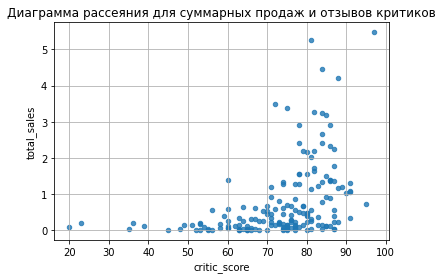

Коэфициент корреляции продаж и оценки критиков: 0.53


In [69]:
top_data.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.8, grid = True)
plt.title(r'Диаграмма рассеяния для суммарных продаж и отзывов критиков')
plt.show()  

print('Коэфициент корреляции продаж и оценки критиков:', "{:.2f}".format(top_data.query('platform == "XOne"')['total_sales'].corr(top_data.query('platform == "XOne"')['critic_score'], method='spearman')))

На диаграмме прослеживается меньшее количество выбросов и видна более четкая связь между оценками критиков и суммарными продажами игр для рассматриваемой платформы.


Коэфициент корреляции между суммарными продажами и оценками критиков имеется положительная взаимосвязь - продажи растут с увеличением оценки критиков.

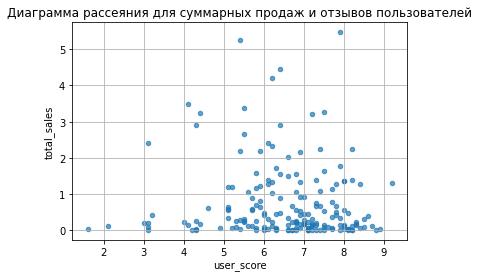

Коэфициент корреляции продаж и оценки пользователей: -0.10


In [70]:
top_data.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, grid = True)
plt.title(r'Диаграмма рассеяния для суммарных продаж и отзывов пользователей')
plt.show() 

print('Коэфициент корреляции продаж и оценки пользователей:', "{:.2f}".format(top_data.query('platform == "XOne"')['total_sales'].corr(top_data.query('platform == "XOne"')['user_score'], method='spearman')))

На диаграмме видно, что между объемами продаж и отзывами пользователей прослеживается очень слабая связь - с ростом продаж пользовательские оценки незначительно увеличиваются.

Коэфициент корреляции между продажами и оценками пользователей отсутсвует.

Оценим взаимосвязи для двух других популярных платформ.

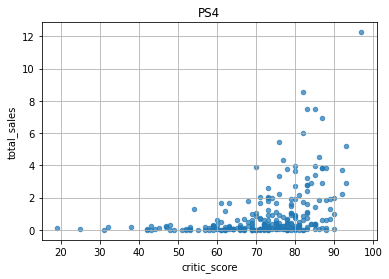

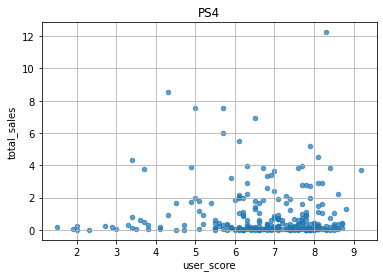

PS4 - коэфициент корреляции продаж и оценки критиков: 0.49
PS4 - коэфициент корреляции продаж и оценки пользователей: -0.06 



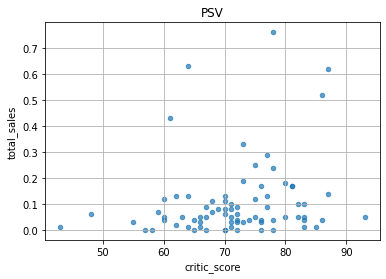

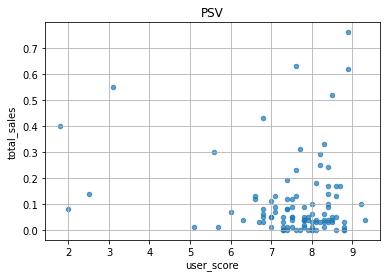

PSV - коэфициент корреляции продаж и оценки критиков: 0.24
PSV - коэфициент корреляции продаж и оценки пользователей: -0.04 



In [71]:
for gg in ['PS4', 'PSV']:
    top_data[top_data["platform"] == gg].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.7, grid = True)
    plt.title(gg)
    plt.show() 
    
    top_data[top_data["platform"] == gg].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.7, grid = True)
    plt.title(gg)
    plt.show() 
    
    print(gg, '- коэфициент корреляции продаж и оценки критиков:', "{:.2f}".format(top_data[top_data["platform"] == gg]['total_sales'].corr(top_data[top_data["platform"] == gg]['critic_score'], method='spearman')))
    print(gg, '- коэфициент корреляции продаж и оценки пользователей:', "{:.2f}".format(top_data[top_data["platform"] == gg]['total_sales'].corr(top_data[top_data["platform"] == gg]['user_score'], method='spearman')), '\n')


На диаграммах видно, что действительно объем суммарных продаж растет с увеличением оценок критиков, но связь нельзя назвать сильной. Между объемами продаж и оценками пользователей связь отстуствует, что можно объяснить тем, что пользовательские оценки могут быть достаточно субъективными по сравнению с оценками критиков.

### Посмотрим на общее распределение игр по жанрам.

Для начала выведем сводную таблицу с информацией о суммарных продажах игр, их количестве для каждого жанра и медианные продажи игр.

In [72]:
top_data.pivot_table(index = 'genre', values = 'total_sales',aggfunc = {'sum','count','median'}).sort_values(by='median', ascending=False)

,count,median,sum
genre,,,
Shooter,187,0.45,226.37
Sports,214,0.22,145.24
Platform,74,0.19,37.84
Racing,85,0.12,37.59
Fighting,80,0.08,27.66
Simulation,62,0.07,17.24
Action,766,0.05,281.38
Role-Playing,292,0.04,94.85
Strategy,56,0.04,8.31


Самые прибыльные жанры - экшен-игры(Role-Playing), шутеры (Shooter) и спортивные симуляторы(Sports). Наименьшей прибыльностью отличаются головоломки, стратегии и симуляторы.

Больше всего выпускается игр в таких жанрах, как экшен, РПГ и квесты, меньше всего выходит симуляторов, стратегий и головоломок(Strategy, Puzzle, Adventure).

Если же рассматривать медианные значения продаж, в топ-3 попали такие жанры, как шутеры, спортивные симуляторы и платформеры, в антитоп - стратегии, головоломки и квесты.

Вывод

В ходе проведение анализа данных было получено следующее:

Рост числа выпускаемых игр начиная с 1980 года объясняется различным уровнем технологического развития, различной доступностью ПК, игровых консолей, приставок и т.д., появлением новых жанров игр, а также различным уровнем популярности игр в целом. К 2008 году количество выпускаемых игр достигло максимального значения - 1427, затем оно пошло на спад, и к 2015 году количество игр было уже более, чем в 2 раза меньше, по сравнению с 2008 годом.

Было определено, что ближе к 2006 году новые платформы начали появляться примерно раз в год. Пик суммарных продаж достигался через 3-5 лет после их выхода. В среднем игры на одной платформе выпускались в течение 10 лет.

Для построения прогноза на 2017 год необходимо учитывать только данные за актуальный период. По причине низкого развития игровой индустрии в ранние годы и с учетом среднего "времени жизни" платформы (10-11 лет) было решено рассматривать период от 2006 до 2016 года.

Были выделены 3 потенциально прибыльные платформы: PlayStation 4, Xbox One и PlayStation Vita.

Оценили, харктер влияния оценок критиков и пользователей на продажи игр. Получили, что объем суммарных продаж растет с увеличением оценок критиков, но связь нельзя назвать сильной. Между объемами продаж и оценками пользователей связь отстуствует, что можно объяснить тем, что пользовательские оценки могут быть достаточно субъективными по сравнению с оценками критиков.

Были выделены самые прибыльные жанры - экшен-игры, шутеры и спортивные симуляторы. Максимальные медианные значения продаж игр в разбивке по жанрам соответствуют шутерам, спортивным симуляторам и платформерам. А больше всего выпускается экшен-игр,РПГ и квестов.

## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [73]:
# топ-5 популярных платформ в каждом регионе
region = ['na_sales', 'eu_sales', 'jp_sales']
for gg in region:
    display((top_data.pivot_table(index = 'platform', values = gg , aggfunc = 'sum')).sort_values(by = gg, ascending = False).head())

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Получаем рейтинг платформ для каждого региона:

- Северная Америка: PlayStation 4, Xbox One, Xbox 360, PlayStation 3, Nintendo 3DS.
- Европа: PlayStation 4, PlayStation 3, Xbox One, Xbox 360, Nintendo 3DS.
- Япония: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4, Nintendo WiiU.

In [74]:
# топ-5 популярных жанров в каждом регионе
for gg in region:
    display((top_data.pivot_table(index = 'genre', values = gg , aggfunc = 'sum')).sort_values(by = gg, ascending = False).head())

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Рейтинг самых популярных жанров, для Европы и Северной Америки они снова практически идентичны. Первые строчки заняли экшен-игры, шутеры, спортивные симуляторы. Пятое место для пользователей из Европы заняли гонки, для игроков из Америки - игры, сочетающие в себе несколько жанров.

В Японии самым популярным жанром игры оказались Role-Playing, экшен-игры, игры, сочетающие несколько жанров, файтинги и шутеры.

Видно, что для Северной Америки и Европы в топ-5 входят одни и те же платформы, разместившиеся на разных позициях. Типы платформ представлены различные: и Xbox, и PlayStation, и Nintendo. Игроки из этих регионов в основном предпочитают стационарные игровые консоли.

В Японии рейтинг представлен японскими платформами Nintendo и PlayStation. Причем в основном игроки предпочитают именно портативные игровые консоли, в отличие от игроков из Америки и Европы

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

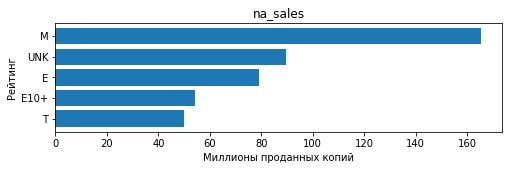

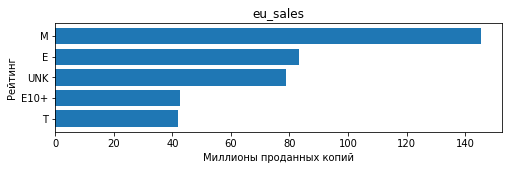

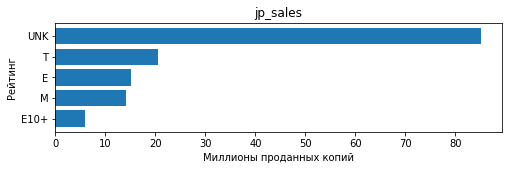

In [75]:
for gg in region:
    plt.figure(figsize=(8,2))
    region_pivot = ((top_data.pivot_table(index = 'rating', values = gg, aggfunc = 'sum')).sort_values(by = gg)).reset_index()
    plt.barh(region_pivot['rating'], region_pivot[gg])
    plt.title(gg)
    plt.ylabel(r'Рейтинг')
    plt.xlabel(r'Миллионы проданных копий')
    plt.show()

В Америке и Европе рейтинги оказались близкими друг к другу. Первые места заняли игры категории М, E ,последние - Е10+ и Т. Для Америки игры без указанной категории заняли второе место по числу проданных копий, для Европы - третье.

В Японии первое место по количеству проданных копий заняли игры без определенного рейтинга (так как у них своя система оценки). Далее по популярности в отличие от других регонов располагаются игры категорий Т, Е, М и Е10+.

Если рассматривать вопрос о том, влияет ли рейтинг ESRB на продажи в каждом регионе, можно сказать, что он наибольшим образом влияет на игры, продаваемые в Америке и Европе.

Вывод

В общих чертах опишем портреты пользователей в каждом регионе:

- Америка - любители экшен-игр, шутеров, спортивных симуляторов с рейтингоv M и Е, в которые играют на стационарных платформах PS4, XOne, X360.

- Европа - типичный игрок, выбирающий также экшен-игры, шутеры и спортивные симуляторы с рейтингами M и Е, выпущенных на стационарных игровых платформах PS4, PS3, XOne.

- Япония - среднестатичтические пользователи выбирают портативные игровые консоли: 3DS и PSV, или стационарную платформу PS3. Любимые жанры: РПГ, экшен-игры и misc с возрастным рейтингом T и Е.

##  Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

О равенстве средних пользовательских рейтингов XOne и PC

В качестве нулевой примем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [76]:
xone = top_data[top_data['platform'] == 'XOne']
pc = top_data[top_data['platform'] == 'PC']

alpha = 0.05 

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'], nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


Получили, что средние пользовательские оценки для Xbox One и PС действительно одинаковые, так как нулевая гипотеза не была отвергнута.

О равенстве средних пользовательских

В качестве нулевой примем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports различаются.

In [77]:
action = top_data[top_data['genre'] == 'Action']
sports = top_data[top_data['genre'] == 'Sports']

alpha = 0.05 

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'], nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


Рассчитанное р-значением оказалось очень небольшим, поэтому нулевая гипотеза нами отверглась. То есть средние пользовательские рейтинги жанров Action и Sports различаются.

Вывод

По итогам проверки гипотез было получено, что средние пользовательские оценки для платформ Xbox One и PС действительно одинаковые, а средние пользовательские рейтинги жанров Action и Sports различаются.

# Общий вывод

Предобработка 
- Заменили названия столбцов (привел к нижнему регистру); 
- Преобразовали данные в нужные типы. Описал, в каких столбцах заменил тип данных и почему; 
- Обработали пропуски; 
- Объяснили, почему заполнил пропуски определённым образом или почему не стали это делать; 
- Описали причины, которые могли привести к пропускам; 
- Обратили внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрали это значение и описали, как его обработали; 
- Посчитали суммарные продажи во всех регионах и записал их в отдельный столбец.


Развитие игр с 1980 года по 2000 было слабым.В 2000 году мы видим активный рост количества игр на полках магазинов. Продолжался этот рост до 2009 года.На 2008 и 2009 год приходится пик графика, значит в эти года производили больше всего игр (1427 и 1426 игр соответсвенно).Начиная с 2010 года количество выпускаемых игр значительно снизилось и остановилось на отметке в 502 игры.

В топ 6 конкурентов среди продаж вошли:

- PlayStation 2 (успешен в 2002-2004 годах)
- Xbox360 (успешен в 2010-2011 годах)
- PlayStation 3 (успешен в 2008-2011 годах)
- Wii Nintendo (успешен в 2006-2009 годах)
- Nintendo DS (успешен в 2007-2008 годах)
- PlayStation (успешен в 1998-1999 годах)

Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются.  При этом видно, что из представленных таблицах все платформы уже не являются актуальными. 
Платформы, показывающие успешные показатели по продажам за 2013-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, и почетное второе место по продажам игр за 2013-2016 год занимает XboxOne. PS4 и XboxOne являются привлекательнее остальных платформ.
Потенциально прибыльные платформы:
- PS4
- XOne
- PSV

Корреляция для XOne (потенциально самой успешной платформы) между пользовательсикими оценками и продажами нет, так как значение почти нулевое. А вот оценки критиков не так, чтобы сильно, но влияют на продажи игр, об этом нам говорит корреляция, чем выше оценка критиков, тем больше происходит продаж.
Самые прибыльные жанры являются шутеры и экшены. Значения их продаж почти доходят до 140 млн проданных копий. ТОП 4 можно отметить следующие жанры:
- Шутеры
- Экшены
- Спортивные игры
- Ролевые игры

Портрет Американца

Любит играть на плейстешн 4. Чаще всего играет в шутеры. Играет в игры для взрослых, видимо в играх много крови

Портрет Европейца

Любит поиграть в PlayStation 4. В основном он проходит игры-экшены. Возможно там тоже много крови, потому что европеец любит играть в игры для взрослых

Портрет Японца

Чаще всего играет на 3DS. Любит поиграть в ролевые игры. Любит кастомные игры, то есть недооценнные игровые шедевры

Не отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Отвергам гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

Подводя итог, можно выделить основные характеристики потенциально успешного продукта:

Приблизительный анализ для кампании на 2017 год.

- Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и PSV.
- Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
- Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
- Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.